## Chapter 3: Derivatives and Automatic Differentiation

# 3.10 Multi-input Taylor Series

We have already seen Taylor Series for single-input functions, as well as the first order Taylor Series approximation for multi-input functions - this was the tangent hyperplane that partial derivatives define at each point of a multi-input function.  In this Section we fill out the remainder of the Taylor Series story for multi-input functions, paying special attention to second order approximations.

In [1]:
# This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
from mlrefined_libraries import basics_library as baslib
from mlrefined_libraries import calculus_library as callib
import autograd.numpy as np

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

## 3.10.1  First order approximation

In Section 4.1 on single-input Taylor Series we saw how the general Taylor Series approximation can be thought of as a natural extension of the tangent line for higher degree polynomial approximations.  The story with multi-input functions is precisely the same. 

If we asked what sort of degree one polynomial $h(\mathbf{w})$ matched a function $g(\mathbf{w})$ at a point $\mathbf{w}^0$ in terms of both its function and gradient value there, i.e.,

\begin{array}
\
1. \,\,\, h\left(\mathbf{w}^0\right) = g\left(\mathbf{w}^0\right) \\
2. \,\,\, \nabla h\left(\mathbf{w}^0\right) = \nabla g\left(\mathbf{w}^0\right) \\
\end{array}

we could setup a system of equations (mirroring the one we setup when asking the analogous question for single-input functions) and recover the tangent hyperplane (our first order Taylor Series approximation)

\begin{equation}
h(\mathbf{w}^0) = g(\mathbf{w}^0) + \nabla g(\mathbf{w}^0)^T(\mathbf{w} - \mathbf{w}^0)
\end{equation}

Notice how this is the exact analog of the first order approximation for single-input functions, and reduces to it (a tangent line) when $N = 1$.

In the next Python cell we plot the first order Taylor Series approximation - shown in lime green - to the function $g(w_0,w_1) = \text{sin}(w_0)$ at a point.

<IPython.core.display.Javascript object>


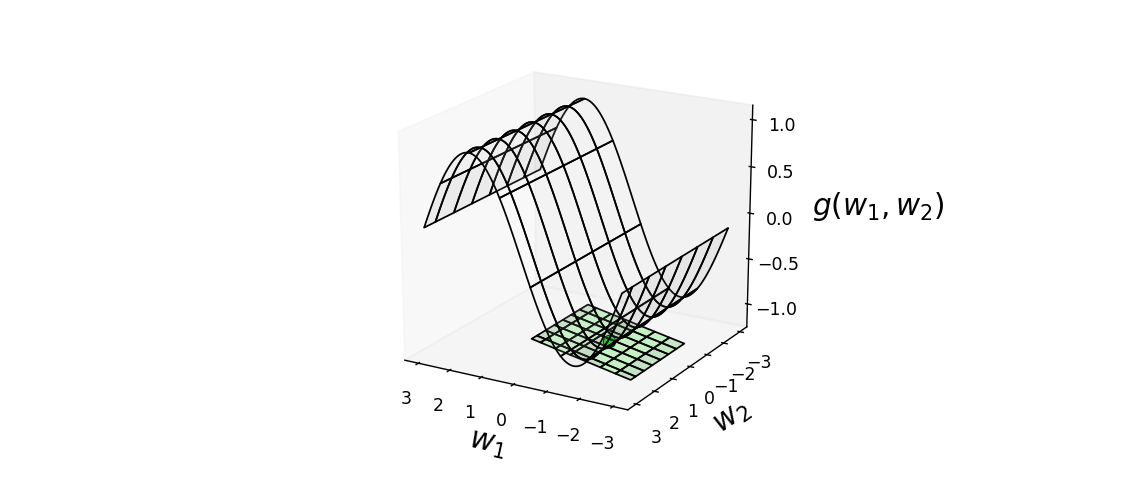

In [4]:
# create a function and point to compute approximation
g = lambda w: np.sin(w[0])
w_val = [-1.5,1]
view = [20,120]

# load in function to examine
viz = callib.taylor3d_viz.visualizer(g = g)

# start examination
viz.draw_it(w_val = w_val,view = view,first_order = True);

## 3.10.2  Second order approximation

Likewise, inquiring about what sort of degree two (quadratic) function $h$ could match $g$ at a point $\mathbf{w}^0$ in terms of the value it takes, as well as the values its first and second derivatives take, i.e.,

\begin{array}
\
1. \,\,\, h\left(\mathbf{w}^0\right) = g\left(\mathbf{w}^0\right) \\
2. \,\,\, \nabla h\left(\mathbf{w}^0\right) = \nabla g\left(\mathbf{w}^0\right) \\
3. \,\,\, \nabla^2 h\left(\mathbf{w}^0\right) = \nabla^2 g\left(\mathbf{w}^0\right) \\
\end{array}

we would likewise derive (as we did explicitly with the single-input case) the second order Taylor Series approximation


\begin{equation}
h(\mathbf{w}) = g(\mathbf{w}^0) + \nabla g(\mathbf{w}^0)^T(\mathbf{w} - \mathbf{w}^0) + \frac{1}{2}(\mathbf{w} - \mathbf{w}^0)^T \nabla^2 g\left(\mathbf{w}^0\right) (\mathbf{w} - \mathbf{w}^0)
\end{equation}

Notice once again how this is the exact analog of the first order approximation for single-input functions, and reduces to it (a tangent quadratic) when $N = 1$.  Also note how this approximator is indeed a multi-input quadratic function (centered at $\mathbf{w}^0$), described in detail in the previous Section.  

This is perhaps easier to see if we make a few substitutions and rearrange the terms.  Briefly denoting $a =  g(\mathbf{w}^0)$, $\mathbf{b} = \nabla g(\mathbf{w}^0)$, and
$\mathbf{C} = \frac{1}{2}\nabla^2 g\left(\mathbf{w}^0\right)$ we can rewrite the above equivalently as

\begin{equation}
g(\mathbf{w}) = a + \mathbf{b}^T \left(\mathbf{w} - \mathbf{w}^0\right) + \left(\mathbf{w} - \mathbf{w}^0\right)^T \mathbf{C} \left(\mathbf{w} - \mathbf{w}^0\right)
\end{equation}

In any case the fact that the second order Taylor Series approximation is a multi-input quadratic means (among other things) that - for example - the general shape it takes on at a given point (its convexity or concavity along each input dimension) is entirely determined by the eigenvalues of $\nabla ^2 g\left(\mathbf{w}^0\right)$.

In the next Python cell we plot the first and second order Taylor Series approximation - shown in lime green and torquoise respectively - to the function $g(w_0,w_1) = \text{sin}(w_0)$ at a point.  As was the case with single-input functions the second order approximation is a much better local approximator than the first, as it contains more derivative information there.

<IPython.core.display.Javascript object>


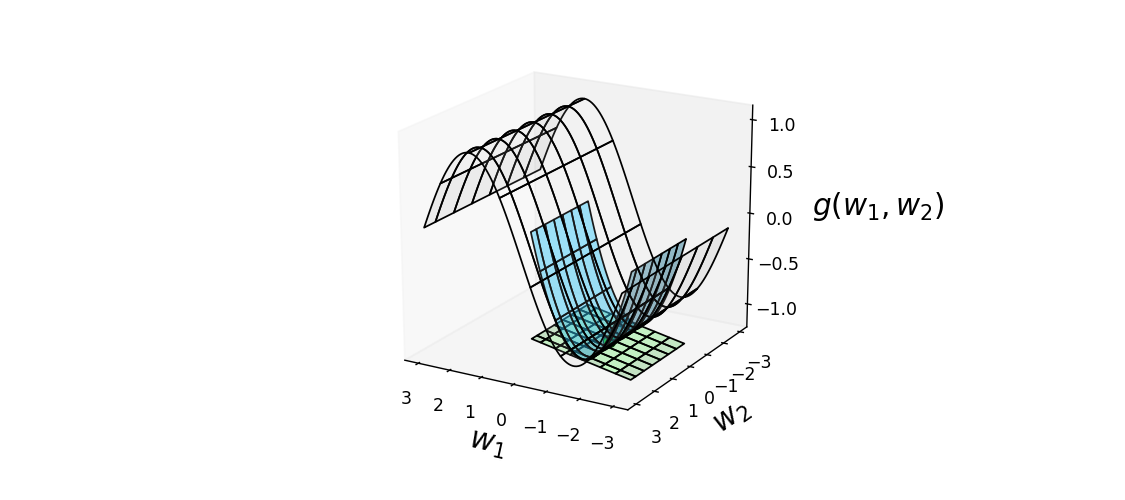

In [5]:
# create a function and point to compute approximation
g = lambda w: np.sin(w[0])
w_val = [-1.5,1]
view = [20,120]

# load in function to examine
viz = callib.taylor3d_viz.visualizer(g = g)

# start examination
viz.draw_it(w_val = w_val,view = view,first_order = True, second_order = True);

## 3.10.3  Higher order approximations

Higher order Taylor Series approximations can be defined precisely as in the single-input case.  The main difference with multi-input functions is that higher order  approximations - starting with the third order derivative - require serious manipulation of tensors of partial derivatives.

Again this can be readily defined, but practically speaking only approximations up to the second order are ever used in practice.  This is because - as we saw in the previous Section - the number of partial derivatives grows *exponentially* in the order of a derivative.   Thus even though we get a better (local) approximator as we increase the order of a Taylor series, the serious pitfall of calculating/storing exponentially many partial derivatives nullifies the benefit.